In [164]:
import numpy as np
import matplotlib.pyplot as plt

In [165]:
def normal(x, mu, sigma):
    return (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def erf(x):
    x0 = np.abs(x)
    sign = np.sign(x)
    # Approximation of the error function
    p = 0.3275911
    a1 = 0.254829592
    a2 = -0.284496736
    a3 = 1.421413741
    a4 = -1.453152027
    a5 = 1.061405429
    t = 1.0 / (1.0 + p * x0)
    return (1.0 - ((a1*t + a2*t**2 + a3*t**3 + a4*t**4 + a5*t**5) * np.exp(-x0**2)))*sign

## From Abramowitz & Stegun (1964), formula 7.1.26, Handbook of Mathematical Functions: with Formulas, Graphs, and Mathematical Tables

In [166]:
### Truncated Gaussian distribution

# The limits for the distribution are:

xmin = 60
xmax = 160

# The CDF of a gaussian distribution:

def GCDF(x):
    return 1/2 * (1 + erf(x/np.sqrt(2))) 

# The PDF and CDF of the truncated gaussian distribution: 

def TruncatedGaussianPDF(x, mu, sigma, xmin, xmax):
    xi = (x - mu) / sigma
    alpha = (xmin - mu) / sigma
    beta = (xmax - mu) / sigma
    Z = GCDF(beta) - GCDF(alpha)
    return np.exp(-xi**2/2) / (sigma * np.sqrt(2 * np.pi) * Z)

def TruncatedGaussianCDF(x, mu, sigma, xmin, xmax):
    xi = (x - mu) / sigma
    alpha = (xmin - mu) / sigma
    beta = (xmax - mu) / sigma
    Z = GCDF(beta) - GCDF(alpha)
    return (GCDF(xi) - GCDF(alpha)) / Z    


def SamplingTruncatedGaussian(mu, sigma, xmin, xmax, size = 1000, steps=0.01):
    i = 0
    sample = np.array([])
    while i < size:
        rand1 = np.random.uniform(0, 1)
        temp = TruncatedGaussianCDF(np.arange(xmin, xmax, steps), mu, sigma, xmin, xmax) - rand1
        sample = np.append(sample, np.arange(xmin, xmax, steps)[np.abs(temp).argmin()])
        i += 1
    return sample

In [167]:
sample1 = SamplingTruncatedGaussian(91.2, 15, xmin, xmax, size=10000, steps=0.005)
sample2 = SamplingTruncatedGaussian(125, 17, xmin, xmax, size=10000, steps=0.005)


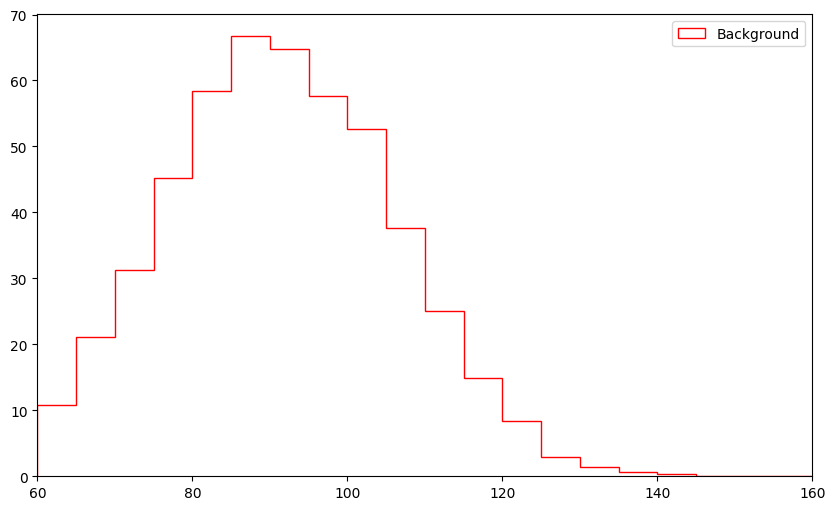

In [168]:
# Defining bin edges for a histogram with 20 equidistant bins between 60 and 160
bins = np.linspace(60, 160, 21)

plt.figure(figsize=(10, 6))
plt.xlim(60, 160)
counts1 = np.histogram(sample1, bins=bins)[0]
plt.hist(bins[:-1], bins=bins, density=False, weights=500/10000*counts1, edgecolor='red', histtype='step', label='Background')
plt.legend()
plt.show()

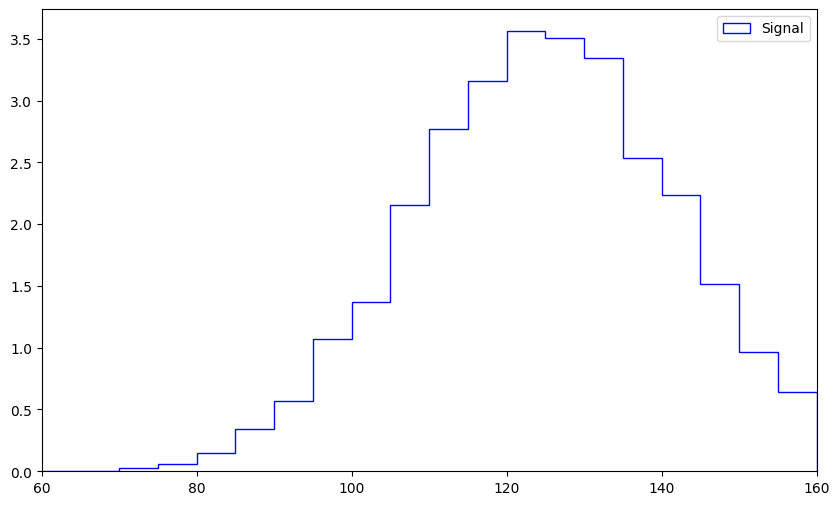

In [169]:
plt.figure(figsize=(10, 6))
counts2 = np.histogram(sample2, bins=bins)[0]
plt.hist(bins[:-1], bins, density=False, weights=30/10000*counts2, edgecolor='blue', histtype='step', label='Signal')
plt.xlim(60, 160)
plt.legend()
plt.show()

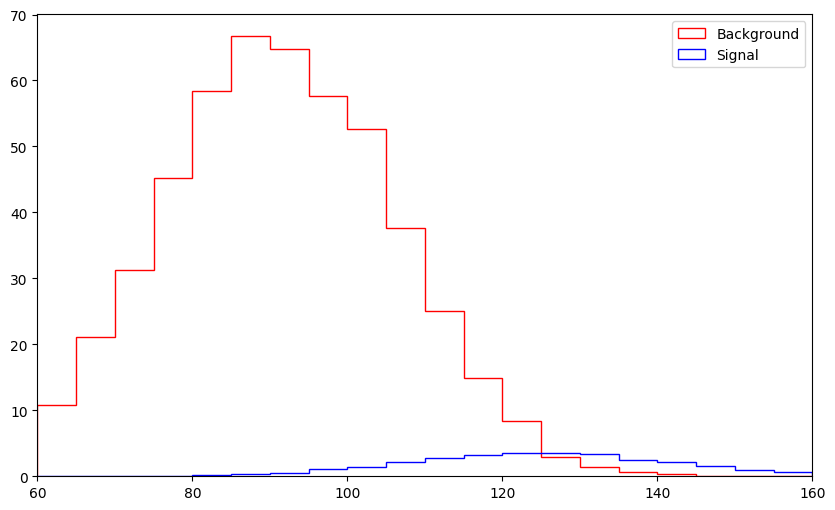

In [170]:
plt.figure(figsize=(10, 6))
plt.hist(bins[:-1], bins=bins, density=False, weights=500/10000*counts1, edgecolor='red', histtype='step', label='Background')
plt.hist(bins[:-1], bins=bins, density=False, weights=30/10000*counts2, edgecolor='blue', histtype='step', label='Signal')
plt.xlim(60, 160)
plt.legend()
plt.show()

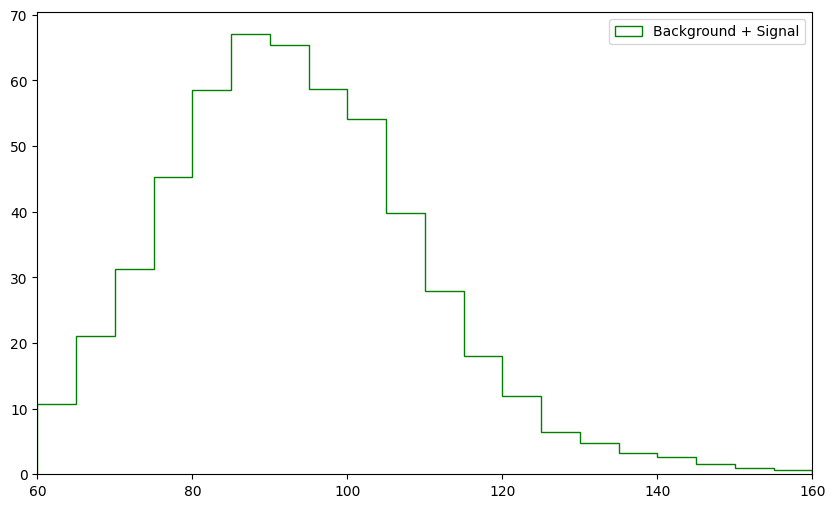

In [171]:
plt.figure(figsize=(10, 6))
plt.hist(bins[:-1], bins=bins, density=False, weights=500/10000*counts1 + 30/10000*counts2, edgecolor='green', histtype='step', label='Background + Signal')
plt.xlim(60, 160)
plt.legend()
plt.show()

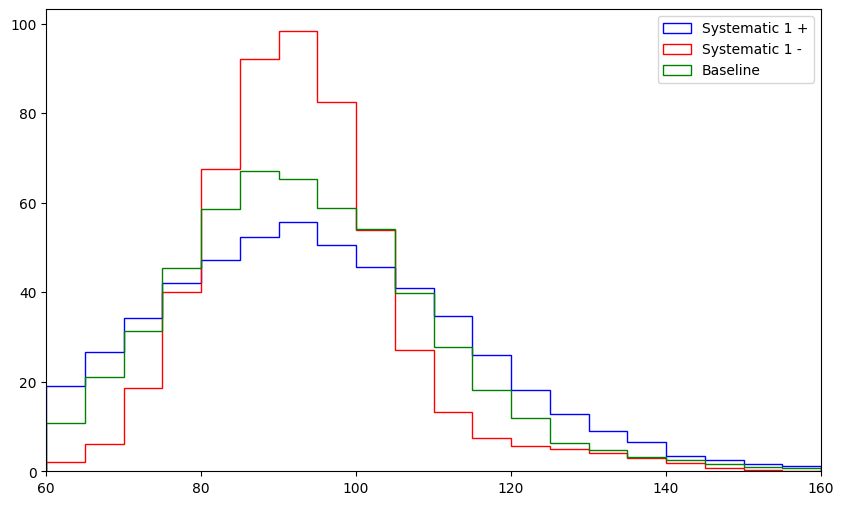

In [172]:
# Systematic 1

sigmavar = 5

sampleSys111 = SamplingTruncatedGaussian(91.2, 15 + sigmavar, xmin, xmax, size=10000, steps=0.005)
sampleSys121 = SamplingTruncatedGaussian(125, 17 + sigmavar, xmin, xmax, size=10000, steps=0.005)

sampleSys112 = SamplingTruncatedGaussian(91.2, 15 - sigmavar, xmin, xmax, size=10000, steps=0.005)
sampleSys122 = SamplingTruncatedGaussian(125, 17 - sigmavar, xmin, xmax, size=10000, steps=0.005)

countsSys111 = np.histogram(sampleSys111, bins=bins)[0]
countsSys121 = np.histogram(sampleSys121, bins=bins)[0]
countsSys112 = np.histogram(sampleSys112, bins=bins)[0]
countsSys122 = np.histogram(sampleSys122, bins=bins)[0]

plt.figure(figsize=(10, 6))
plt.hist(bins[:-1], bins=bins, density=False, weights=500/10000*countsSys111 + 30/10000*countsSys121, edgecolor='blue', histtype='step', label='Systematic 1 +')
plt.hist(bins[:-1], bins=bins, density=False, weights=500/10000*countsSys112 + 30/10000*countsSys122, edgecolor='red', histtype='step', label='Systematic 1 -')
plt.hist(bins[:-1], bins=bins, density=False, weights=500/10000*counts1 + 30/10000*counts2, edgecolor='green', histtype='step', label='Baseline')
plt.xlim(60, 160)
plt.legend()
plt.show()

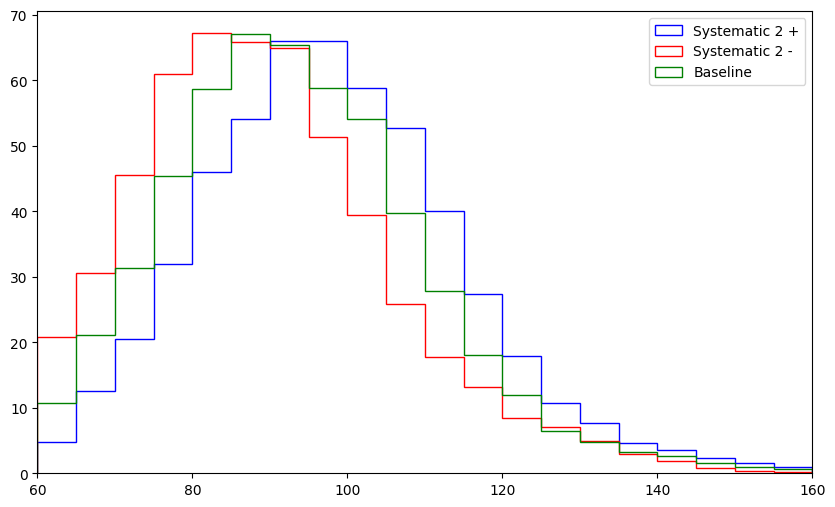

In [173]:
# Systematic 2

muvar = 5

sampleSys211 = SamplingTruncatedGaussian(91.2 + muvar, 15, xmin, xmax, size=10000, steps=0.005)
sampleSys221 = SamplingTruncatedGaussian(125 + muvar, 17, xmin, xmax, size=10000, steps=0.005)

sampleSys212 = SamplingTruncatedGaussian(91.2 - muvar, 15, xmin, xmax, size=10000, steps=0.005)
sampleSys222 = SamplingTruncatedGaussian(125, 17 - muvar, xmin, xmax, size=10000, steps=0.005)

countsSys211 = np.histogram(sampleSys211, bins=bins)[0]
countsSys221 = np.histogram(sampleSys221, bins=bins)[0]
countsSys212 = np.histogram(sampleSys212, bins=bins)[0]
countsSys222 = np.histogram(sampleSys222, bins=bins)[0]

plt.figure(figsize=(10, 6))
plt.hist(bins[:-1], bins=bins, density=False, weights=500/10000*countsSys211 + 30/10000*countsSys221, edgecolor='blue', histtype='step', label='Systematic 2 +')
plt.hist(bins[:-1], bins=bins, density=False, weights=500/10000*countsSys212 + 30/10000*countsSys222, edgecolor='red', histtype='step', label='Systematic 2 -')
plt.hist(bins[:-1], bins=bins, density=False, weights=500/10000*counts1 + 30/10000*counts2, edgecolor='green', histtype='step', label='Baseline')
plt.xlim(60, 160)
plt.legend()
plt.show()

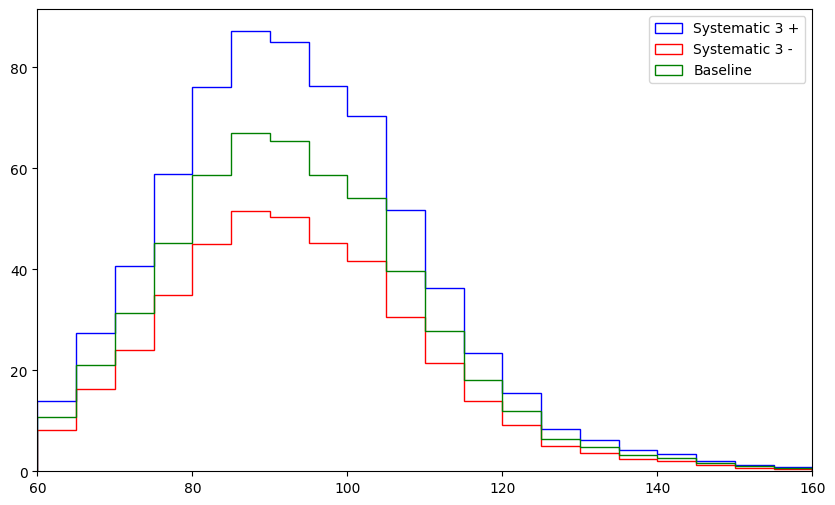

In [174]:
# Systematic 3 

count_scale = 1.3

plt.figure(figsize=(10, 6))
plt.hist(bins[:-1], bins=bins, density=False, weights=count_scale*(500/10000*counts1 + 30/10000*counts2), edgecolor='blue', histtype='step', label='Systematic 3 +')
plt.hist(bins[:-1], bins=bins, density=False, weights= 1/count_scale*(500/10000*counts1 + 30/10000*counts2), edgecolor='red', histtype='step', label='Systematic 3 -')
plt.hist(bins[:-1], bins=bins, density=False, weights=500/10000*counts1 + 30/10000*counts2, edgecolor='green', histtype='step', label='Baseline')
plt.xlim(60, 160)
plt.legend()
plt.show()

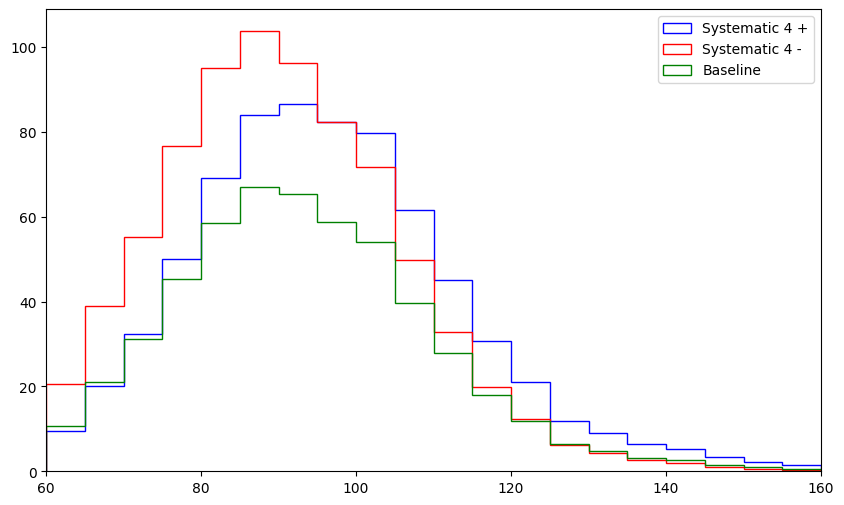

In [175]:
# Systematic 4

#t = np.arange(bins[0], bins[-2], 0.01)

count_scale = 0.7*(2/(bins[-2] - bins[0])*bins[:-1]) 
invcount_scale = 0.7*(-2/(bins[-2] - bins[0])*bins[:-1]+4)

plt.figure(figsize=(10, 6))
plt.hist(bins[:-1], bins=bins, density=False, weights=count_scale*(500/10000*counts1 + 30/10000*counts2), edgecolor='blue', histtype='step', label='Systematic 4 +')
plt.hist(bins[:-1], bins=bins, density=False, weights=invcount_scale*(500/10000*counts1 + 30/10000*counts2), edgecolor='red', histtype='step', label='Systematic 4 -')
plt.hist(bins[:-1], bins=bins, density=False, weights=500/10000*counts1 + 30/10000*counts2, edgecolor='green', histtype='step', label='Baseline')
plt.xlim(60, 160)
plt.legend()
plt.show()